In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
import random

#**Pendientes**

In [ ]:
def process_pending_data(file_path):
    # Cargar CSV
    df = pd.read_csv(file_path)

    ###scaler = MinMaxScaler()

    # Mantener ciertas columnas
    df = df[["FECHA DE CIERRE","CARGA", "ITEM", "CANTIDAD"]]

    # Crea un nuevo DataFrame 'dft' con solo las columnas "FECHA DE CIERRE" y "CARGA".
    dft = df[["FECHA DE CIERRE","CARGA"]]

    # Calcular el número de ocurrencias de cada valor único en la columna "CARGA".
    dfv = df["CARGA"].value_counts()

    # Agrupar los datos por "CARGA" y "ITEM", y sumar las cantidades de cada grupo.
    df = df.groupby(['CARGA', 'ITEM']).agg({'CANTIDAD': 'sum'}).reset_index()

    # Crear una tabla pivote donde las filas son "CARGA" y las columnas son "ITEM",
    # y los valores son la suma de "CANTIDAD". Los valores faltantes se completan con 0.
    dfl = df.pivot_table(index='CARGA', columns='ITEM', values='CANTIDAD', fill_value=0)
    dfl.columns = [col for col in dfl.columns]

    # Combinar el DataFrame de fechas y cargas únicas ('dft') con la tabla pivote 'dfl',
    dfl = pd.merge(dft.drop_duplicates(), dfl, on='CARGA', how="inner")

    # Combinar el conteo de cargas 'dfv' con el DataFrame resultante 'dfl',
    df = pd.merge(dfv, dfl, on='CARGA', how="inner")

    # Renombrar la columna 'count' a 'Pallet' para indicar el número de pallets por carga.
    df = df.rename(columns={'count': 'Pallet'})

    # Convertir la columna "FECHA DE CIERRE" a tipo datetime, usando el formato específico.
    df['FECHA DE CIERRE'] = pd.to_datetime(df['FECHA DE CIERRE'], format='%d/%m/%Y %H:%M:%S')

    # Restar la fecha actual a cada fecha de cierre, obteniendo una diferencia de tiempo.
    df['FECHA DE CIERRE'] = df['FECHA DE CIERRE'] - datetime.now()

    # Convertir la diferencia de tiempo en minutos y hacer que los valores sean positivos.
    df["FECHA DE CIERRE"] = df["FECHA DE CIERRE"].apply(lambda x: int(x.total_seconds() / 60))
    df["FECHA DE CIERRE"] = df["FECHA DE CIERRE"] * -1

    ###df["Pallet"] = scaler.fit_transform(df[['Pallet']])
    ###df["FECHA DE CIERRE"] = scaler.fit_transform(df[['FECHA DE CIERRE']])

    return df

In [ ]:
pending = process_pending_data("Pendientes.csv")
pending

,CARGA,Pallet,FECHA DE CIERRE,124440,124543,126475,126800,126894,127550,127556,...,514950,515101,515108,515120,515122,515123,C3H,CB2,CT1,TARIMA
0,BAAOB24909442,30,41008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,294.0,294.0,0.0,0.0,0.0,0.0,0.0
1,BAAOB24917277,30,39573,0.0,0.0,0.0,0.0,0.0,98.0,0.0,...,0.0,637.0,0.0,294.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BAAOB24912024,30,40173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BAAOB24917260,30,39968,0.0,0.0,0.0,0.0,49.0,196.0,0.0,...,0.0,364.0,0.0,294.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BAAOB24917249,30,39937,330.0,0.0,0.0,0.0,147.0,49.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,BAAOB24920231,30,39916,0.0,0.0,0.0,0.0,98.0,98.0,0.0,...,0.0,546.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0
6,BAAOB24909429,30,39471,0.0,0.0,0.0,0.0,0.0,0.0,96.0,...,0.0,364.0,0.0,245.0,294.0,0.0,0.0,0.0,0.0,0.0
7,BAAOB24926489,30,39572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,BAAOB24909420,26,40460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,273.0,0.0,539.0,0.0,0.0,0.0,0.0,0.0,0.0
9,BAAOB24927623,26,39653,0.0,0.0,0.0,0.0,0.0,49.0,96.0,...,0.0,637.0,0.0,196.0,0.0,0.0,0.0,0.0,0.0,0.0


#**Órdenes**

In [ ]:
def process_demand_data(file_path):
    # Cargar el archivo CSV
    df = pd.read_csv(file_path)

    # Filtrar las columnas necesarias
    df = df[["Orden", "Articulo", "Cantidad solicitada", "orderdtlstatus", "Precio de venta"]]

    # Filtrar las filas con 'orderdtlstatus' igual a 'Created'
    df = df[df['orderdtlstatus'] == 'Created']

    precio_total_por_orden = df.groupby('Orden')['Precio de venta'].sum().reset_index()

    # Agrupar los datos por 'Orden' y 'Articulo' para sumar las cantidades solicitadas
    df_agrupado = df.groupby(['Orden', 'Articulo'])['Cantidad solicitada'].sum().reset_index()

    # Pivotear el DataFrame para obtener una tabla con las órdenes como filas y los artículos como columnas
    df_ordenes = df_agrupado.pivot(index='Orden', columns='Articulo', values='Cantidad solicitada').fillna(0)

    df_ordenes = df_ordenes.reset_index()

    df_ordenes = pd.merge(df_ordenes, precio_total_por_orden, on='Orden', how='left')
    df_ordenes = df_ordenes.rename(columns={'Precio de venta': 'Precio de venta total'})


    return df_ordenes

In [ ]:
orders = process_demand_data('Ordenes.csv')
orders

,Orden,800,2530,6011,6444,31090,31811,35549,38447,38582,...,514976,514988,515007,515069,515101,515108,515120,515122,515123,Precio de venta total
0,3077005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1030.92
1,3081701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.08
2,3083500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2053.00
3,3083874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3237.93
4,3083882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4373.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,9763116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.80
70,9764066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.06
71,9764098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.66
72,9764194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.04


In [ ]:
from google.colab import files

pending.to_csv('pending.csv', encoding='utf-8', index=False)
orders.to_csv('orders.csv', encoding='utf-8', index=False)
files.download('pending.csv')
files.download('orders.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Búsqueda de Cruce y Mutación**

In [ ]:
def algoritmo_genetico_experiment(camiones_df, demanda_df, num_bahias=9, num_generaciones=300,
                                  tamaño_poblacion=50, prob_cruce=0.9, prob_mutacion=0.1, Tp=2):
    # Funciones internas
    def cargar_camiones(df_camiones):
        camiones = []
        for index, row in df_camiones.iterrows():
            camion = {
                'nombre': row['CARGA'],
                'Ai': row['FECHA DE CIERRE'],
                'Pi': row['Pallet'],
                'uij': row[3:].values.tolist(),
                'prioridad': 0
            }
            camiones.append(camion)
        return camiones

    def cargar_demanda(df_demanda):
        productos = []
        nombres_productos = df_demanda.columns[1:-1]
        for index, row in df_demanda.iterrows():
            producto = {
                'nombre': nombres_productos,
                'gamma': row['Precio de venta total'],
                'demanda_minima': row[1:-1].sum()
            }
            productos.append(producto)
        return productos

    def calcular_prioridad(camion, productos):
        return sum(producto['gamma'] * uij for uij, producto in zip(camion['uij'], productos))

    def inicializar_poblacion(num_camiones):
        poblacion = []
        for _ in range(tamaño_poblacion):
            camiones_disponibles = list(range(num_camiones))
            random.shuffle(camiones_disponibles)
            individuo = [[] for _ in range(num_bahias)]
            for bahia in range(num_bahias):
                num_camiones_bahia = len(camiones_disponibles) // (num_bahias - bahia)
                camiones_asignados = camiones_disponibles[:num_camiones_bahia]
                individuo[bahia] = camiones_asignados
                camiones_disponibles = camiones_disponibles[num_camiones_bahia:]
            poblacion.append(individuo)
        return poblacion

    def calcular_fitness(individuo, camiones, productos):
        fitness_total = 0
        tiempo_total = 0
        for bahia in individuo:
            tprevio = 0
            for camion_id in bahia:
                camion = camiones[camion_id]
                tiempo_servicio = camion['Pi'] * Tp
                ti = max(camion['Ai'], tprevio)
                fitness_total += camion['prioridad'] * (ti + tiempo_servicio)
                tiempo_total += (tiempo_servicio + ti - camion['Ai'])
                tprevio = ti + tiempo_servicio
        return fitness_total, tiempo_total

    def seleccion(poblacion, fitness):
        seleccionados = []
        for _ in range(tamaño_poblacion):
            torneo = random.sample(list(enumerate(fitness)), 3)
            ganador = max(torneo, key=lambda x: x[1][0])
            seleccionados.append(poblacion[ganador[0]])
        return seleccionados

    def cruce_parcialmente_mapeado(padre1, padre2):
        hijo1, hijo2 = [[] for _ in range(num_bahias)], [[] for _ in range(num_bahias)]
        usados_hijo1, usados_hijo2 = set(), set()
        for i in range(num_bahias):
            for camion in padre1[i]:
                if camion not in usados_hijo1:
                    hijo1[i].append(camion)
                    usados_hijo1.add(camion)
            for camion in padre2[i]:
                if camion not in usados_hijo2:
                    hijo2[i].append(camion)
                    usados_hijo2.add(camion)
        return hijo1, hijo2

    def cruce_de_orden(padre1, padre2):
        hijo1 = [None] * len(padre1)
        hijo2 = [None] * len(padre2)
        inicio, fin = sorted(random.sample(range(len(padre1)), 2))
        hijo1[inicio:fin] = padre1[inicio:fin]
        hijo2[inicio:fin] = padre2[inicio:fin]
        def completar_hijo(hijo, otro_padre, inicio, fin):
            pos = fin
            for camion in otro_padre:
                if camion not in hijo:
                    if pos >= len(hijo):
                        pos = 0
                    hijo[pos] = camion
                    pos += 1
        completar_hijo(hijo1, padre2, inicio, fin)
        completar_hijo(hijo2, padre1, inicio, fin)
        return hijo1, hijo2

    def mutacion_intercambio(individuo):
        bahias_no_vacias = [i for i, b in enumerate(individuo) if b]
        if len(bahias_no_vacias) > 1:
            bahia1, bahia2 = random.sample(bahias_no_vacias, 2)
            if individuo[bahia1] and individuo[bahia2]:
                camion1 = random.choice(individuo[bahia1])
                camion2 = random.choice(individuo[bahia2])
                individuo[bahia1].remove(camion1)
                individuo[bahia2].remove(camion2)
                individuo[bahia1].append(camion2)
                individuo[bahia2].append(camion1)
        return individuo

    def mutacion_inversion(individuo):
        bahia = random.choice([b for b in individuo if len(b) > 1])
        if len(bahia) > 1:
            i, j = sorted(random.sample(range(len(bahia)), 2))
            bahia[i:j+1] = reversed(bahia[i:j+1])
        return individuo

    def ejecutar_algoritmo(camiones, productos, cruce, mutacion):
        for camion in camiones:
            camion['prioridad'] = calcular_prioridad(camion, productos)

        poblacion = inicializar_poblacion(len(camiones))
        historico_fitness = []

        for generacion in range(num_generaciones):
            fitness = [calcular_fitness(individuo, camiones, productos) for individuo in poblacion]
            historico_fitness.extend([f[0] for f in fitness])

            poblacion_seleccionada = seleccion(poblacion, fitness)

            nueva_poblacion = []
            for i in range(0, tamaño_poblacion, 2):
                padre1, padre2 = poblacion_seleccionada[i], poblacion_seleccionada[i + 1]

                # Aplicar probabilidad de cruce
                if random.random() < prob_cruce:
                    hijo1, hijo2 = cruce(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1[:], padre2[:]

                # Aplicar probabilidad de mutación
                nueva_poblacion.append(mutacion(hijo1) if random.random() < prob_mutacion else hijo1)
                nueva_poblacion.append(mutacion(hijo2) if random.random() < prob_mutacion else hijo2)

            poblacion = nueva_poblacion

        return max(historico_fitness)

    combinaciones = [
        ("Cruce Parcialmente Mapeado + Mutación Intercambio", cruce_parcialmente_mapeado, mutacion_intercambio),
        ("Cruce Parcialmente Mapeado + Mutación Inversión", cruce_parcialmente_mapeado, mutacion_inversion),
        ("Cruce de Orden + Mutación Intercambio", cruce_de_orden, mutacion_intercambio),
        ("Cruce de Orden + Mutación Inversión", cruce_de_orden, mutacion_inversion)
    ]

    resultados = {}
    scaler = MinMaxScaler()
    for name, cruce, mutacion in combinaciones:
        fitness_ganadores = []

        for semilla in range(30):
            random.seed(semilla)
            camiones = cargar_camiones(camiones_df)
            productos = cargar_demanda(demanda_df)
            fitness_ganador = ejecutar_algoritmo(camiones, productos, cruce, mutacion)
            fitness_ganadores.append(fitness_ganador)

        fitness_ganadores_escalados = scaler.fit_transform(np.array(fitness_ganadores).reshape(-1, 1)).flatten()
        promedio_fitness = np.mean(fitness_ganadores_escalados)
        desviacion_estandar_fitness = np.std(fitness_ganadores_escalados)

        resultados[name] = {
            'Promedio Fitness': promedio_fitness,
            'Desviación Estándar Fitness': desviacion_estandar_fitness
        }

    return resultados

def ejecutar_experimentos_multiples(camiones_data, demanda_data, num_problemas=6):
    descripciones = [
        "Configuración básica",
        "Aumento en la cantidad de camiones",
        "Reducción en la demanda total",
        "Incremento en la demanda de ciertos productos",
        "Número reducido de camiones",
        "Alta prioridad para algunos camiones y reducción en la cantidad de camiones"
    ]

    resultados_globales = []

    for problema in range(num_problemas):
        camiones_df = camiones_data.copy()
        demanda_df = demanda_data.copy()

        # Aplicar variaciones específicas a cada problema
        if problema == 1:
            camiones_df = pd.concat([camiones_df, camiones_df.sample(frac=0.2, random_state=42)], ignore_index=True)

        elif problema == 2:
            demanda_df.iloc[:, 1:-1] *= 0.7

        elif problema == 3:
            demanda_df.iloc[:, 1:6] *= 1.5

        elif problema == 4:
            camiones_df = camiones_df.sample(frac=0.5, random_state=42).reset_index(drop=True)

        elif problema == 5:
            camiones_df = camiones_df.sample(frac=0.5, random_state=42).reset_index(drop=True)
            camiones_df['Prioridad'] = 0
            camiones_df.loc[:4, 'Prioridad'] = 100

        resultados = algoritmo_genetico_experiment(camiones_df, demanda_df)

        resultado_problema = {
            #'Problema': f'Problema {problema + 1}',
            'Descripción': descripciones[problema]
        }

        for combinacion, valores in resultados.items():
            resultado_problema[f'{combinacion} - Promedio Fitness'] = valores['Promedio Fitness']
            resultado_problema[f'{combinacion} - Desviación Estándar Fitness'] = valores['Desviación Estándar Fitness']

        resultados_globales.append(resultado_problema)

    resultados_df = pd.DataFrame(resultados_globales)
    return resultados_df

# Cargar datasets
pending = pd.read_csv('pending.csv')
orders = pd.read_csv('orders.csv')

# Ejecutar los experimentos y mostrar el DataFrame con descripciones y estilo
resultados_df = ejecutar_experimentos_multiples(pending.copy(), orders.copy())

# Aplicar estilo para una visualización mejorada
styled_resultados_df = (resultados_df.style
                        .set_properties(**{'text-align': 'center', 'font-size': '12pt'})
                        .set_caption("Resultados de Experimentos Genéticos por Problema y Combinación con Descripción"))

# Mostrar el DataFrame
styled_resultados_df

,Descripción,Cruce Parcialmente Mapeado + Mutación Intercambio - Promedio Fitness,Cruce Parcialmente Mapeado + Mutación Intercambio - Desviación Estándar Fitness,Cruce Parcialmente Mapeado + Mutación Inversión - Promedio Fitness,Cruce Parcialmente Mapeado + Mutación Inversión - Desviación Estándar Fitness,Cruce de Orden + Mutación Intercambio - Promedio Fitness,Cruce de Orden + Mutación Intercambio - Desviación Estándar Fitness,Cruce de Orden + Mutación Inversión - Promedio Fitness,Cruce de Orden + Mutación Inversión - Desviación Estándar Fitness
0,Configuración básica,0.550991,0.237007,0.454310,0.221204,0.425007,0.234140,0.527552,0.273353
1,Aumento en la cantidad de camiones,0.463518,0.315084,0.515391,0.241965,0.445725,0.245902,0.504510,0.256669
2,Reducción en la demanda total,0.550991,0.237007,0.454310,0.221204,0.425007,0.234140,0.527552,0.273353
3,Incremento en la demanda de ciertos productos,0.550991,0.237007,0.454310,0.221204,0.425007,0.234140,0.527552,0.273353
4,Número reducido de camiones,0.672257,0.389597,0.515292,0.243439,0.065300,0.174440,0.505664,0.225792
5,Alta prioridad para algunos camiones y reducción en la cantidad de camiones,0.672261,0.389602,0.515307,0.243438,0.064993,0.174610,0.504978,0.228885


In [ ]:
resultados_df.to_csv('resultados_df.csv', index=False)

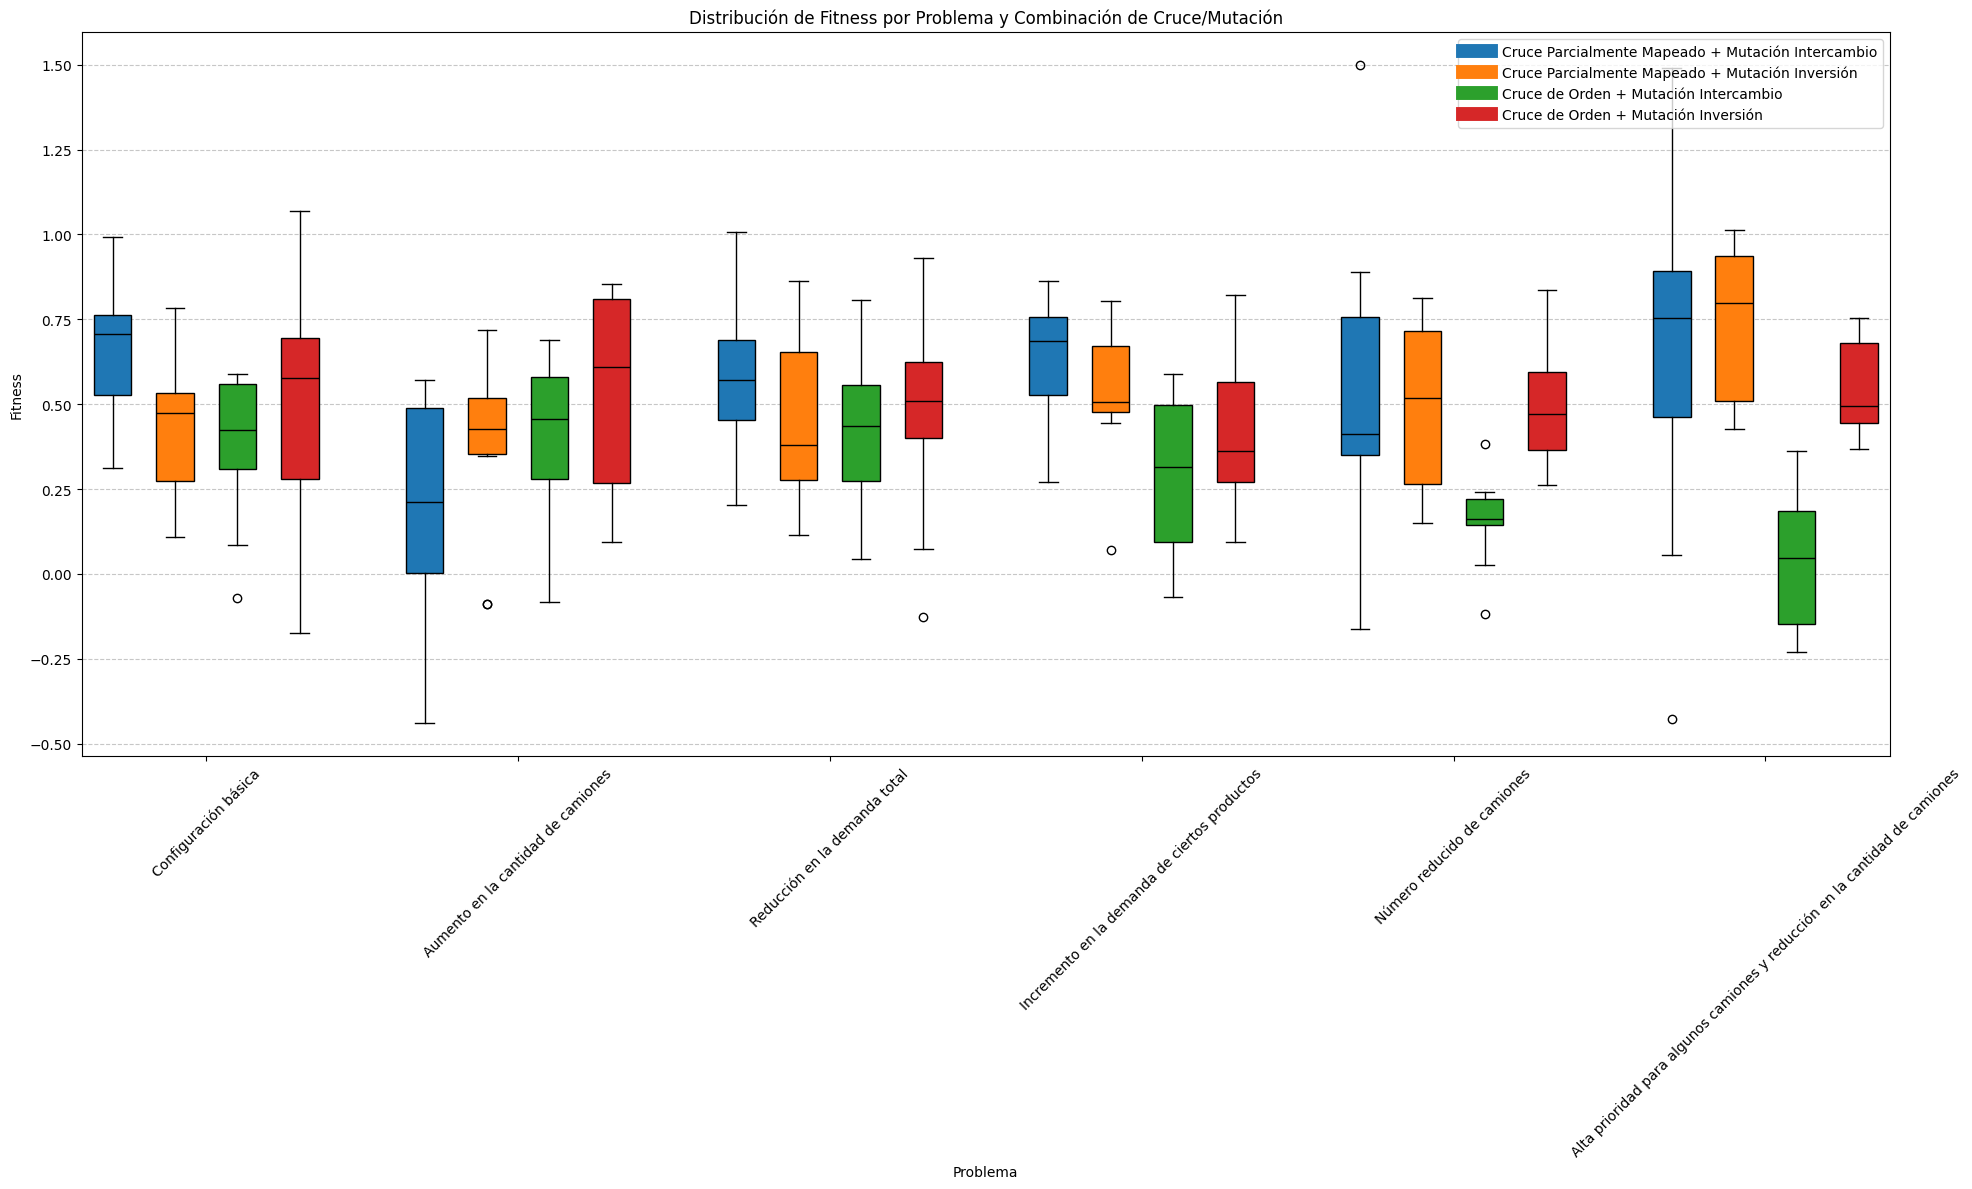

In [ ]:
def graficar_fitness_por_problema(df):

    # Definir las combinaciones y colores
    combinaciones = [
        "Cruce Parcialmente Mapeado + Mutación Intercambio",
        "Cruce Parcialmente Mapeado + Mutación Inversión",
        "Cruce de Orden + Mutación Intercambio",
        "Cruce de Orden + Mutación Inversión"
    ]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Obtener los problemas desde la columna 'Descripción'
    problemas = df["Descripción"].values
    num_problemas = len(problemas)
    num_combinaciones = len(combinaciones)

    # Crear listas de listas para almacenar datos de fitness por combinación y problema
    fitness_data = [[] for _ in range(num_combinaciones)]
    for idx, combinacion in enumerate(combinaciones):
        promedio_col = f"{combinacion} - Promedio Fitness"
        desviacion_col = f"{combinacion} - Desviación Estándar Fitness"

        for i in range(num_problemas):
            promedio = df.loc[i, promedio_col]
            desviacion = df.loc[i, desviacion_col]
            # Simular datos de fitness alrededor del promedio usando la desviación estándar
            valores_fitness = np.random.normal(loc=promedio, scale=desviacion, size=10)
            fitness_data[idx].append(valores_fitness)

    # Crear el gráfico de boxplot
    plt.figure(figsize=(20, 12))

    # Generar boxplots para cada combinación de cada problema
    for idx, (data, color) in enumerate(zip(fitness_data, colors)):
        for i, valores in enumerate(data):
            plt.boxplot(
                valores,
                positions=[i * (num_combinaciones + 1) + idx],
                widths=0.6,
                patch_artist=True,
                boxprops=dict(facecolor=color),
                medianprops=dict(color="black")
            )

    # Configuración de etiquetas y títulos
    plt.xticks(np.arange(num_problemas) * (num_combinaciones + 1) + 1.5, problemas, rotation=45)
    plt.xlabel("Problema")
    plt.ylabel("Fitness")
    plt.title("Distribución de Fitness por Problema y Combinación de Cruce/Mutación")

    # Leyenda con colores y combinaciones
    for idx, (combinacion, color) in enumerate(zip(combinaciones, colors)):
        plt.plot([], [], color=color, label=combinacion, linewidth=10)
    plt.legend(loc="upper right", bbox_to_anchor=(1, 1))

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ejecutar la función con el DataFrame cargado
graficar_fitness_por_problema(resultados_df)

#**Búsqueda de probabilidades para cruce y mutación, y tamaño de población**

In [ ]:
def algoritmo_genetico_experiment(camiones_df, demanda_df, num_bahias=9, num_generaciones=300,
                                  tamaño_poblacion=50, Tp=2):
    # Funciones internas
    def cargar_camiones(df_camiones):
        camiones = []
        for index, row in df_camiones.iterrows():
            camion = {
                'nombre': row['CARGA'],
                'Ai': row['FECHA DE CIERRE'],
                'Pi': row['Pallet'],
                'uij': row[3:].values.tolist(),
                'prioridad': 0
            }
            camiones.append(camion)
        return camiones

    def cargar_demanda(df_demanda):
        productos = []
        nombres_productos = df_demanda.columns[1:-1]
        for index, row in df_demanda.iterrows():
            producto = {
                'nombre': nombres_productos,
                'gamma': row['Precio de venta total'],
                'demanda_minima': row[1:-1].sum()
            }
            productos.append(producto)
        return productos

    def calcular_prioridad(camion, productos):
        return sum(producto['gamma'] * uij for uij, producto in zip(camion['uij'], productos))

    def inicializar_poblacion(num_camiones):
        poblacion = []
        for _ in range(tamaño_poblacion):
            camiones_disponibles = list(range(num_camiones))
            random.shuffle(camiones_disponibles)
            individuo = [[] for _ in range(num_bahias)]
            for bahia in range(num_bahias):
                num_camiones_bahia = len(camiones_disponibles) // (num_bahias - bahia)
                camiones_asignados = camiones_disponibles[:num_camiones_bahia]
                individuo[bahia] = camiones_asignados
                camiones_disponibles = camiones_disponibles[num_camiones_bahia:]
            poblacion.append(individuo)
        return poblacion

    def calcular_fitness(individuo, camiones, productos):
        fitness_total = 0
        tiempo_total = 0
        for bahia in individuo:
            tprevio = 0
            for camion_id in bahia:
                camion = camiones[camion_id]
                tiempo_servicio = camion['Pi'] * Tp
                ti = max(camion['Ai'], tprevio)
                fitness_total += camion['prioridad'] * (ti + tiempo_servicio)
                tiempo_total += (tiempo_servicio + ti - camion['Ai'])
                tprevio = ti + tiempo_servicio
        return fitness_total, tiempo_total

    def seleccion(poblacion, fitness):
        seleccionados = []
        for _ in range(tamaño_poblacion):
            torneo = random.sample(list(enumerate(fitness)), 3)
            ganador = max(torneo, key=lambda x: x[1][0])
            seleccionados.append(poblacion[ganador[0]])
        return seleccionados

    def cruce_parcialmente_mapeado(padre1, padre2):
        hijo1, hijo2 = [[] for _ in range(num_bahias)], [[] for _ in range(num_bahias)]
        usados_hijo1, usados_hijo2 = set(), set()
        for i in range(num_bahias):
            for camion in padre1[i]:
                if camion not in usados_hijo1:
                    hijo1[i].append(camion)
                    usados_hijo1.add(camion)
            for camion in padre2[i]:
                if camion not in usados_hijo2:
                    hijo2[i].append(camion)
                    usados_hijo2.add(camion)
        return hijo1, hijo2

    def mutacion_intercambio(individuo):
        bahias_no_vacias = [i for i, b in enumerate(individuo) if b]
        if len(bahias_no_vacias) > 1:
            bahia1, bahia2 = random.sample(bahias_no_vacias, 2)
            if individuo[bahia1] and individuo[bahia2]:
                camion1 = random.choice(individuo[bahia1])
                camion2 = random.choice(individuo[bahia2])
                individuo[bahia1].remove(camion1)
                individuo[bahia2].remove(camion2)
                individuo[bahia1].append(camion2)
                individuo[bahia2].append(camion1)
        return individuo


    def ejecutar_algoritmo(camiones, productos, prob_cruce, prob_mutacion):
        for camion in camiones:
            camion['prioridad'] = calcular_prioridad(camion, productos)

        poblacion = inicializar_poblacion(len(camiones))
        historico_fitness = []

        for generacion in range(num_generaciones):
            fitness = [calcular_fitness(individuo, camiones, productos) for individuo in poblacion]
            historico_fitness.extend([f[0] for f in fitness])

            poblacion_seleccionada = seleccion(poblacion, fitness)

            nueva_poblacion = []
            for i in range(0, len(poblacion_seleccionada) - 1, 2):
                padre1, padre2 = poblacion_seleccionada[i], poblacion_seleccionada[i + 1]

                # Aplicar probabilidad de cruce
                if random.random() < prob_cruce:
                    hijo1, hijo2 = cruce_parcialmente_mapeado(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1[:], padre2[:]

                # Aplicar probabilidad de mutación
                nueva_poblacion.append(mutacion_intercambio(hijo1) if random.random() < prob_mutacion else hijo1)
                nueva_poblacion.append(mutacion_intercambio(hijo2) if random.random() < prob_mutacion else hijo2)

            if len(poblacion_seleccionada) % 2 != 0:
                nueva_poblacion.append(poblacion_seleccionada[-1])

            poblacion = nueva_poblacion

        return max(historico_fitness)

    # Definir las combinaciones de probabilidades de cruce y mutación
    combinaciones_probabilidades = [(0.85, 0.15), (0.9, 0.1), (0.95, 0.05)]
    resultados_globales = {}

    # Probar diferentes tamaños de población
    for tamaño_poblacion in [50, 75, 100, 125, 150]:
        resultados_fila = {}
        for prob_cruce, prob_mutacion in combinaciones_probabilidades:
            fitness_ganadores = []
            for semilla in range(30):
                random.seed(semilla)
                camiones = cargar_camiones(camiones_df)
                productos = cargar_demanda(demanda_df)
                fitness_ganador = ejecutar_algoritmo(camiones, productos, prob_cruce, prob_mutacion)
                fitness_ganadores.append(fitness_ganador)

            # Escalar los resultados
            scaler = MinMaxScaler()
            fitness_ganadores_escalados = scaler.fit_transform(np.array(fitness_ganadores).reshape(-1, 1)).flatten()
            promedio_fitness = np.mean(fitness_ganadores_escalados)
            resultados_fila[f'P({prob_cruce}, M{prob_mutacion})'] = promedio_fitness

        resultados_globales[f'Tamaño Población {tamaño_poblacion}'] = resultados_fila

    # Crear un DataFrame para los resultados
    resultados_df = pd.DataFrame(resultados_globales).T
    return resultados_df

# Cargar datasets
pending = pd.read_csv('pending.csv')
orders = pd.read_csv('orders.csv')

# Ejecutar los experimentos y mostrar el DataFrame
resultados_df2 = algoritmo_genetico_experiment(pending.copy(), orders.copy())
resultados_df2.style.set_properties(**{'text-align': 'center', 'font-size': '12pt'}).set_caption("Resultados de Experimentos Genéticos por Tamaño de Población y Combinación de Probabilidades")

resultados_df2

,"P(0.85, M0.15)","P(0.9, M0.1)","P(0.95, M0.05)"
Tamaño Población 50,0.657905,0.550991,0.657126
Tamaño Población 75,0.651700,0.777229,0.586741
Tamaño Población 100,0.554677,0.706342,0.598733
Tamaño Población 125,0.752140,0.613398,0.668431
Tamaño Población 150,0.773508,0.676625,0.767155


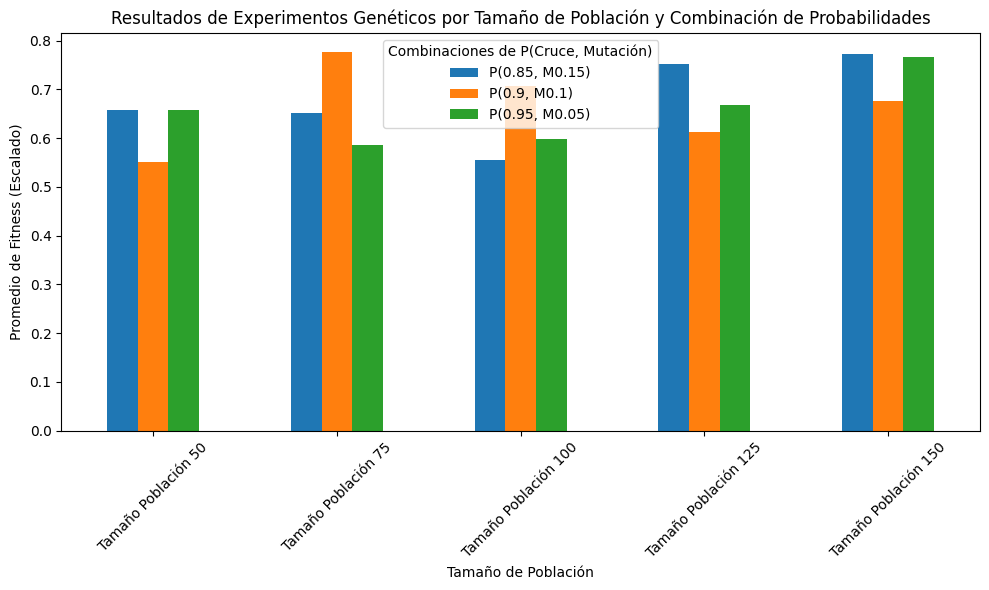

In [ ]:
# Crear el gráfico de barras
resultados_df2.plot(kind='bar', figsize=(10, 6))

# Personalizar el gráfico
plt.title('Resultados de Experimentos Genéticos por Tamaño de Población y Combinación de Probabilidades')
plt.xlabel('Tamaño de Población')
plt.ylabel('Promedio de Fitness (Escalado)')
plt.xticks(rotation=45)
plt.legend(title='Combinaciones de P(Cruce, Mutación)')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#**Algoritmo genético**

In [ ]:
def algoritmo_genetico_experiment(camiones_df, demanda_df, num_bahias=9, num_generaciones=300,
                                  tamaño_poblacion=150, prob_cruce=0.85, prob_mutacion=0.15, Tp=1):
    # Funciones internas
    def cargar_camiones(df_camiones):
        camiones = []
        for index, row in df_camiones.iterrows():
            camion = {
                'nombre': row['CARGA'],  # Asignar el ID del camión
                'Ai': row['FECHA DE CIERRE'],
                'Pi': row['Pallet'],
                'uij': row[3:].values.tolist(),
                'prioridad': 0
            }
            camiones.append(camion)
        return camiones

    def cargar_demanda(df_demanda):
        productos = []
        nombres_productos = df_demanda.columns[1:-1]
        for index, row in df_demanda.iterrows():
            producto = {
                'nombre': nombres_productos,
                'gamma': row['Precio de venta total'],
                'demanda_minima': row[1:-1].sum()
            }
            productos.append(producto)
        return productos

    def calcular_prioridad(camion, productos):
        return sum(producto['gamma'] * uij for uij, producto in zip(camion['uij'], productos))

    def inicializar_poblacion(num_camiones):
        poblacion = []
        for _ in range(tamaño_poblacion):
            camiones_disponibles = list(range(num_camiones))
            random.shuffle(camiones_disponibles)
            individuo = [[] for _ in range(num_bahias)]
            for bahia in range(num_bahias):
                num_camiones_bahia = len(camiones_disponibles) // (num_bahias - bahia)
                camiones_asignados = camiones_disponibles[:num_camiones_bahia]
                individuo[bahia] = camiones_asignados
                camiones_disponibles = camiones_disponibles[num_camiones_bahia:]
            poblacion.append(individuo)
        return poblacion

    def calcular_fitness(individuo, camiones, productos):
        fitness_total = 0
        tiempo_total = 0
        for bahia in individuo:
            tprevio = 0
            for camion_id in bahia:
                camion = camiones[camion_id]
                tiempo_servicio = camion['Pi'] * Tp
                ti = max(camion['Ai'], tprevio)
                fitness_total += camion['prioridad'] * (ti + tiempo_servicio)
                tiempo_total += (tiempo_servicio + ti - camion['Ai'])
                tprevio = ti + tiempo_servicio
        return fitness_total, tiempo_total

    def seleccion(poblacion, fitness):
        seleccionados = []
        for _ in range(tamaño_poblacion):
            torneo = random.sample(list(enumerate(fitness)), 3)
            ganador = max(torneo, key=lambda x: x[1][0])
            seleccionados.append(poblacion[ganador[0]])
        return seleccionados

    def cruce_parcialmente_mapeado(padre1, padre2):
        hijo1, hijo2 = [[] for _ in range(num_bahias)], [[] for _ in range(num_bahias)]
        usados_hijo1, usados_hijo2 = set(), set()
        for i in range(num_bahias):
            for camion in padre1[i]:
                if camion not in usados_hijo1:
                    hijo1[i].append(camion)
                    usados_hijo1.add(camion)
            for camion in padre2[i]:
                if camion not in usados_hijo2:
                    hijo2[i].append(camion)
                    usados_hijo2.add(camion)
        return hijo1, hijo2

    def mutacion_intercambio(individuo):
        bahias_no_vacias = [i for i, b in enumerate(individuo) if b]
        if len(bahias_no_vacias) > 1:
            bahia1, bahia2 = random.sample(bahias_no_vacias, 2)
            if individuo[bahia1] and individuo[bahia2]:
                camion1 = random.choice(individuo[bahia1])
                camion2 = random.choice(individuo[bahia2])
                individuo[bahia1].remove(camion1)
                individuo[bahia2].remove(camion2)
                individuo[bahia1].append(camion2)
                individuo[bahia2].append(camion1)
        return individuo

    def ejecutar_algoritmo(camiones, productos):
        for camion in camiones:
            camion['prioridad'] = calcular_prioridad(camion, productos)

        poblacion = inicializar_poblacion(len(camiones))
        mejor_individuo = None
        mejor_fitness = float('-inf')
        mejor_tiempo_total = None
        historico_fitness = []

        for generacion in range(num_generaciones):
            fitness = [calcular_fitness(individuo, camiones, productos) for individuo in poblacion]
            historico_fitness.extend([f[0] for f in fitness])
            poblacion_seleccionada = seleccion(poblacion, fitness)

            nueva_poblacion = []
            for i in range(0, len(poblacion_seleccionada) - 1, 2):
                padre1, padre2 = poblacion_seleccionada[i], poblacion_seleccionada[i + 1]

                # Aplicar probabilidad de cruce
                if random.random() < prob_cruce:
                    hijo1, hijo2 = cruce_parcialmente_mapeado(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1[:], padre2[:]

                # Aplicar probabilidad de mutación
                nueva_poblacion.append(mutacion_intercambio(hijo1) if random.random() < prob_mutacion else hijo1)
                nueva_poblacion.append(mutacion_intercambio(hijo2) if random.random() < prob_mutacion else hijo2)

            # Si el tamaño de la población es impar, añade el último individuo sin modificar
            if len(poblacion_seleccionada) % 2 != 0:
                nueva_poblacion.append(poblacion_seleccionada[-1])

            poblacion = nueva_poblacion

            # Almacenar el mejor individuo de esta generación
            for ind, (fit, tiempo_total) in zip(poblacion, fitness):
                if fit > mejor_fitness:
                    mejor_fitness = fit
                    mejor_individuo = ind
                    mejor_tiempo_total = tiempo_total


        return mejor_individuo, mejor_tiempo_total

    # Cargar y preparar datos
    camiones = cargar_camiones(camiones_df)
    productos = cargar_demanda(demanda_df)

    # Ejecutar el algoritmo
    mejor_individuo, tiempo_total_ganador = ejecutar_algoritmo(camiones, productos)

    # Mostrar resultados
    print(f"Tiempo total final: {tiempo_total_ganador}")
    print("\nOrden de los camiones en las 9 bahías:")
    for i, bahia in enumerate(mejor_individuo, start=1):
        bahia_ids = [camiones[camion_id]['nombre'] for camion_id in bahia]
        print(f"Bahía {i}: {bahia_ids}")

# Cargar datasets
pending = pd.read_csv('pending.csv')
orders = pd.read_csv('orders.csv')

# Ejecutar el algoritmo genético y mostrar el orden de los camiones y el tiempo total
algoritmo_genetico_experiment(pending.copy(), orders.copy())

Tiempo total final: 78141

Orden de los camiones en las 9 bahías:
Bahía 1: ['ATLOB24921618_2', 'ATLOB24934629_1', 'ATLOB24934629_2', 'ATLOB24913306_1', 'CATL0086861', 'BABOB24910204_2']
Bahía 2: ['ATLOB24913304_1', 'BAAOB24912024', 'JBIOB24890622_1', 'JBIOB24890614_1', 'BAAOB24909428', 'JBIOB24890614_2']
Bahía 3: ['CBAK0064943', 'BAAOB24909429', 'BAAOB24918191', 'BAAOB24909442', 'BABOB24910204_1', 'BAAOB24909420']
Bahía 4: ['BAAOB24911846', 'BAAOB24917249', 'BAAOB24917260', 'BAAOB24909414', 'BAAOB24920062', 'BAAOB24927631']
Bahía 5: ['ATLOB24913304_2', 'BAAOB24920231', 'JBIOB24890622_2', 'BAAOB24912014', 'BAAOB24909431', 'BAAOB24914382']
Bahía 6: ['ATLOB24921613_2', 'BAAOB24917251', 'BAAOB24927623', 'BAAOB24911921', 'BAAOB24917277', 'BAAOB24927629']
Bahía 7: ['ATLOB24913300_1', 'ATLOB24921619_2', 'ATLOB24921618_1', 'ATLOB24934630_2', 'BAAOB24912028', 'ATLOB24913306_2']
Bahía 8: ['JBIOB24918930_2', 'BAAOB24909423', 'ATLOB24934627_1', 'ATLOB24934630_1', 'BAAOB24926489', 'ATLOB24934627_2'

#**Pueba de Wilcoxon**

In [ ]:
from scipy.stats import wilcoxon

# Función base del algoritmo genético simplificado
def algoritmo_genetico_experiment(camiones_df, demanda_df, num_bahias=9, num_generaciones=300,
                                  tamaño_poblacion=50, prob_cruce=0.9, prob_mutacion=0.1, Tp=2):

    # Funciones internas
    def cargar_camiones(df_camiones):
        camiones = []
        for index, row in df_camiones.iterrows():
            camion = {
                'nombre': row['CARGA'],
                'Ai': row['FECHA DE CIERRE'],
                'Pi': row['Pallet'],
                'uij': row[3:].values.tolist(),
                'prioridad': 0
            }
            camiones.append(camion)
        return camiones

    def cargar_demanda(df_demanda):
        productos = []
        nombres_productos = df_demanda.columns[1:-1]
        for index, row in df_demanda.iterrows():
            producto = {
                'nombre': nombres_productos,
                'gamma': row['Precio de venta total'],
                'demanda_minima': row[1:-1].sum()
            }
            productos.append(producto)
        return productos

    def calcular_prioridad(camion, productos):
        return sum(producto['gamma'] * uij for uij, producto in zip(camion['uij'], productos))

    def inicializar_poblacion(num_camiones):
        poblacion = []
        for _ in range(tamaño_poblacion):
            camiones_disponibles = list(range(num_camiones))
            random.shuffle(camiones_disponibles)
            individuo = [[] for _ in range(num_bahias)]
            for bahia in range(num_bahias):
                num_camiones_bahia = len(camiones_disponibles) // (num_bahias - bahia)
                camiones_asignados = camiones_disponibles[:num_camiones_bahia]
                individuo[bahia] = camiones_asignados
                camiones_disponibles = camiones_disponibles[num_camiones_bahia:]
            poblacion.append(individuo)
        return poblacion

    def calcular_fitness(individuo, camiones, productos):
        fitness_total = 0
        tiempo_total = 0
        for bahia in individuo:
            tprevio = 0
            for camion_id in bahia:
                camion = camiones[camion_id]
                tiempo_servicio = camion['Pi'] * Tp
                ti = max(camion['Ai'], tprevio)
                fitness_total += camion['prioridad'] * (ti + tiempo_servicio)
                tiempo_total += (tiempo_servicio + ti - camion['Ai'])
                tprevio = ti + tiempo_servicio
        return fitness_total, tiempo_total

    def seleccion(poblacion, fitness):
        seleccionados = []
        for _ in range(tamaño_poblacion):
            torneo = random.sample(list(enumerate(fitness)), 3)
            ganador = max(torneo, key=lambda x: x[1][0])
            seleccionados.append(poblacion[ganador[0]])
        return seleccionados

    def cruce_parcialmente_mapeado(padre1, padre2):
        hijo1, hijo2 = [[] for _ in range(num_bahias)], [[] for _ in range(num_bahias)]
        usados_hijo1, usados_hijo2 = set(), set()
        for i in range(num_bahias):
            for camion in padre1[i]:
                if camion not in usados_hijo1:
                    hijo1[i].append(camion)
                    usados_hijo1.add(camion)
            for camion in padre2[i]:
                if camion not in usados_hijo2:
                    hijo2[i].append(camion)
                    usados_hijo2.add(camion)
        return hijo1, hijo2

    def cruce_de_orden(padre1, padre2):
        hijo1 = [None] * len(padre1)
        hijo2 = [None] * len(padre2)
        inicio, fin = sorted(random.sample(range(len(padre1)), 2))
        hijo1[inicio:fin] = padre1[inicio:fin]
        hijo2[inicio:fin] = padre2[inicio:fin]
        def completar_hijo(hijo, otro_padre, inicio, fin):
            pos = fin
            for camion in otro_padre:
                if camion not in hijo:
                    if pos >= len(hijo):
                        pos = 0
                    hijo[pos] = camion
                    pos += 1
        completar_hijo(hijo1, padre2, inicio, fin)
        completar_hijo(hijo2, padre1, inicio, fin)
        return hijo1, hijo2

    def mutacion_intercambio(individuo):
        bahias_no_vacias = [i for i, b in enumerate(individuo) if b]
        if len(bahias_no_vacias) > 1:
            bahia1, bahia2 = random.sample(bahias_no_vacias, 2)
            if individuo[bahia1] and individuo[bahia2]:
                camion1 = random.choice(individuo[bahia1])
                camion2 = random.choice(individuo[bahia2])
                individuo[bahia1].remove(camion1)
                individuo[bahia2].remove(camion2)
                individuo[bahia1].append(camion2)
                individuo[bahia2].append(camion1)
        return individuo

    def mutacion_inversion(individuo):
        bahia = random.choice([b for b in individuo if len(b) > 1])
        if len(bahia) > 1:
            i, j = sorted(random.sample(range(len(bahia)), 2))
            bahia[i:j+1] = reversed(bahia[i:j+1])
        return individuo

    # Ejecutar solo una configuración sin variaciones en los datos
    def ejecutar_algoritmo(camiones, productos, cruce, mutacion):
        for camion in camiones:
            camion['prioridad'] = calcular_prioridad(camion, productos)

        poblacion = inicializar_poblacion(len(camiones))
        historico_fitness = []

        for generacion in range(num_generaciones):
            fitness = [calcular_fitness(individuo, camiones, productos) for individuo in poblacion]
            historico_fitness.extend([f[0] for f in fitness])

            poblacion_seleccionada = seleccion(poblacion, fitness)

            nueva_poblacion = []
            for i in range(0, tamaño_poblacion, 2):
                padre1, padre2 = poblacion_seleccionada[i], poblacion_seleccionada[i + 1]

                if random.random() < prob_cruce:
                    hijo1, hijo2 = cruce(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1[:], padre2[:]

                nueva_poblacion.append(mutacion(hijo1) if random.random() < prob_mutacion else hijo1)
                nueva_poblacion.append(mutacion(hijo2) if random.random() < prob_mutacion else hijo2)

            poblacion = nueva_poblacion

        return max(historico_fitness)

    combinaciones = [
        ("Cruce Parcialmente Mapeado + Mutación Intercambio", cruce_parcialmente_mapeado, mutacion_intercambio),
        ("Cruce Parcialmente Mapeado + Mutación Inversión", cruce_parcialmente_mapeado, mutacion_inversion),
        ("Cruce de Orden + Mutación Intercambio", cruce_de_orden, mutacion_intercambio),
        ("Cruce de Orden + Mutación Inversión", cruce_de_orden, mutacion_inversion)
    ]

    resultados = {}
    for name, cruce, mutacion in combinaciones:
        fitness_ganadores = []
        for semilla in range(30):
            random.seed(semilla)
            camiones = cargar_camiones(camiones_df)
            productos = cargar_demanda(demanda_df)
            fitness_ganador = ejecutar_algoritmo(camiones, productos, cruce, mutacion)
            fitness_ganadores.append(fitness_ganador)

        resultados[name] = fitness_ganadores

    return resultados

# Cargar datasets
pending = pd.read_csv('pending.csv')
orders = pd.read_csv('orders.csv')

# Obtener resultados para la configuración básica
resultados = algoritmo_genetico_experiment(pending.copy(), orders.copy())

# Prueba de Wilcoxon entre combinaciones
alpha = 0.05
combinaciones_nombres = list(resultados.keys())
num_combinaciones = len(combinaciones_nombres)

# Ejecutar pruebas entre cada par de combinaciones
for i in range(num_combinaciones):
    for j in range(i + 1, num_combinaciones):
        nombre_1 = combinaciones_nombres[i]
        nombre_2 = combinaciones_nombres[j]

        configuracion_1 = resultados[nombre_1]
        configuracion_2 = resultados[nombre_2]

        # Prueba de Wilcoxon
        stat, p_value = wilcoxon(configuracion_1, configuracion_2)
        print(f"Comparación entre {nombre_1} y {nombre_2}:")
        print("Estadístico:", stat)
        print("Valor p:", p_value)

        if p_value < alpha:
            print("Diferencia significativa\n")
        else:
            print("No hay diferencia significativa\n")


Comparación entre Cruce Parcialmente Mapeado + Mutación Intercambio y Cruce Parcialmente Mapeado + Mutación Inversión:
Estadístico: 0.0
Valor p: 1.862645149230957e-09
Diferencia significativa

Comparación entre Cruce Parcialmente Mapeado + Mutación Intercambio y Cruce de Orden + Mutación Intercambio:
Estadístico: 0.0
Valor p: 1.862645149230957e-09
Diferencia significativa

Comparación entre Cruce Parcialmente Mapeado + Mutación Intercambio y Cruce de Orden + Mutación Inversión:
Estadístico: 0.0
Valor p: 1.862645149230957e-09
Diferencia significativa

Comparación entre Cruce Parcialmente Mapeado + Mutación Inversión y Cruce de Orden + Mutación Intercambio:
Estadístico: 5.0
Valor p: 1.862645149230957e-08
Diferencia significativa

Comparación entre Cruce Parcialmente Mapeado + Mutación Inversión y Cruce de Orden + Mutación Inversión:
Estadístico: 0.0
Valor p: 1.862645149230957e-09
Diferencia significativa

Comparación entre Cruce de Orden + Mutación Intercambio y Cruce de Orden + Mutación

In [ ]:
def algoritmo_genetico_experiment(camiones_df, demanda_df, num_bahias=9, num_generaciones=300, tamaño_poblacion=150, Tp=2):

    # Funciones internas
    def cargar_camiones(df_camiones):
        camiones = []
        for index, row in df_camiones.iterrows():
            camion = {
                'nombre': row['CARGA'],
                'Ai': row['FECHA DE CIERRE'],
                'Pi': row['Pallet'],
                'uij': row[3:].values.tolist(),
                'prioridad': 0
            }
            camiones.append(camion)
        return camiones

    def cargar_demanda(df_demanda):
        productos = []
        nombres_productos = df_demanda.columns[1:-1]
        for index, row in df_demanda.iterrows():
            producto = {
                'nombre': nombres_productos,
                'gamma': row['Precio de venta total'],
                'demanda_minima': row[1:-1].sum()
            }
            productos.append(producto)
        return productos

    def calcular_prioridad(camion, productos):
        return sum(producto['gamma'] * uij for uij, producto in zip(camion['uij'], productos))

    def inicializar_poblacion(num_camiones):
        poblacion = []
        for _ in range(tamaño_poblacion):
            camiones_disponibles = list(range(num_camiones))
            random.shuffle(camiones_disponibles)
            individuo = [[] for _ in range(num_bahias)]
            for bahia in range(num_bahias):
                num_camiones_bahia = len(camiones_disponibles) // (num_bahias - bahia)
                camiones_asignados = camiones_disponibles[:num_camiones_bahia]
                individuo[bahia] = camiones_asignados
                camiones_disponibles = camiones_disponibles[num_camiones_bahia:]
            poblacion.append(individuo)
        return poblacion

    def calcular_fitness(individuo, camiones, productos):
        fitness_total = 0
        tiempo_total = 0
        for bahia in individuo:
            tprevio = 0
            for camion_id in bahia:
                camion = camiones[camion_id]
                tiempo_servicio = camion['Pi'] * Tp
                ti = max(camion['Ai'], tprevio)
                fitness_total += camion['prioridad'] * (ti + tiempo_servicio)
                tiempo_total += (tiempo_servicio + ti - camion['Ai'])
                tprevio = ti + tiempo_servicio
        return fitness_total, tiempo_total

    def seleccion(poblacion, fitness):
        seleccionados = []
        for _ in range(tamaño_poblacion):
            torneo = random.sample(list(enumerate(fitness)), 3)
            ganador = max(torneo, key=lambda x: x[1][0])
            seleccionados.append(poblacion[ganador[0]])
        return seleccionados

    def cruce_parcialmente_mapeado(padre1, padre2):
        hijo1, hijo2 = [[] for _ in range(num_bahias)], [[] for _ in range(num_bahias)]
        usados_hijo1, usados_hijo2 = set(), set()
        for i in range(num_bahias):
            for camion in padre1[i]:
                if camion not in usados_hijo1:
                    hijo1[i].append(camion)
                    usados_hijo1.add(camion)
            for camion in padre2[i]:
                if camion not in usados_hijo2:
                    hijo2[i].append(camion)
                    usados_hijo2.add(camion)
        return hijo1, hijo2

    def mutacion_intercambio(individuo):
        bahias_no_vacias = [i for i, b in enumerate(individuo) if b]
        if len(bahias_no_vacias) > 1:
            bahia1, bahia2 = random.sample(bahias_no_vacias, 2)
            if individuo[bahia1] and individuo[bahia2]:
                camion1 = random.choice(individuo[bahia1])
                camion2 = random.choice(individuo[bahia2])
                individuo[bahia1].remove(camion1)
                individuo[bahia2].remove(camion2)
                individuo[bahia1].append(camion2)
                individuo[bahia2].append(camion1)
        return individuo

    def ejecutar_algoritmo(camiones, productos, prob_cruce, prob_mutacion):
        for camion in camiones:
            camion['prioridad'] = calcular_prioridad(camion, productos)

        poblacion = inicializar_poblacion(len(camiones))
        historico_fitness = []

        for generacion in range(num_generaciones):
            fitness = [calcular_fitness(individuo, camiones, productos) for individuo in poblacion]
            historico_fitness.extend([f[0] for f in fitness])

            poblacion_seleccionada = seleccion(poblacion, fitness)
            nueva_poblacion = []

            for i in range(0, len(poblacion_seleccionada) - 1, 2):
                padre1, padre2 = poblacion_seleccionada[i], poblacion_seleccionada[i + 1]
                if random.random() < prob_cruce:
                    hijo1, hijo2 = cruce_parcialmente_mapeado(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1[:], padre2[:]

                nueva_poblacion.append(mutacion_intercambio(hijo1) if random.random() < prob_mutacion else hijo1)
                nueva_poblacion.append(mutacion_intercambio(hijo2) if random.random() < prob_mutacion else hijo2)

            if len(poblacion_seleccionada) % 2 != 0:
                nueva_poblacion.append(poblacion_seleccionada[-1])

            poblacion = nueva_poblacion

        return max(historico_fitness)

    combinaciones_probabilidades = [(0.85, 0.15), (0.9, 0.1), (0.95, 0.05)]
    resultados_fila = {}

    # Ejecutar el algoritmo con tamaño de población de 150 y cada combinación de probabilidad
    for prob_cruce, prob_mutacion in combinaciones_probabilidades:
        fitness_ganadores = []
        for semilla in range(30):
            random.seed(semilla)
            camiones = cargar_camiones(camiones_df)
            productos = cargar_demanda(demanda_df)
            fitness_ganador = ejecutar_algoritmo(camiones, productos, prob_cruce, prob_mutacion)
            fitness_ganadores.append(fitness_ganador)
        resultados_fila[f'P({prob_cruce}, M{prob_mutacion})'] = fitness_ganadores

    return resultados_fila

# Cargar datasets
pending = pd.read_csv('pending.csv')
orders = pd.read_csv('orders.csv')

# Obtener resultados para tamaño de población de 150
resultados = algoritmo_genetico_experiment(pending.copy(), orders.copy())

# Comparación estadística con prueba de Wilcoxon entre combinaciones para población de 150
alpha = 0.05
combinaciones_nombres = list(resultados.keys())
num_combinaciones = len(combinaciones_nombres)

print("\nComparaciones para Tamaño de Población 150:\n")
for i in range(num_combinaciones):
    for j in range(i + 1, num_combinaciones):
        nombre_1 = combinaciones_nombres[i]
        nombre_2 = combinaciones_nombres[j]

        configuracion_1 = resultados[nombre_1]
        configuracion_2 = resultados[nombre_2]

        # Prueba de Wilcoxon
        stat, p_value = wilcoxon(configuracion_1, configuracion_2)
        print(f"Comparación entre {nombre_1} y {nombre_2}:")
        print("Estadístico:", stat)
        print("Valor p:", p_value)

        if p_value < alpha:
            print("Diferencia significativa\n")
        else:
            print("No hay diferencia significativa\n")


Comparaciones para Tamaño de Población 150:

Comparación entre P(0.85, M0.15) y P(0.9, M0.1):
Estadístico: 180.0
Valor p: 0.28936620615422726
No hay diferencia significativa

Comparación entre P(0.85, M0.15) y P(0.95, M0.05):
Estadístico: 84.0
Valor p: 0.0015832837671041489
Diferencia significativa

Comparación entre P(0.9, M0.1) y P(0.95, M0.05):
Estadístico: 147.0
Valor p: 0.0803273618221283
No hay diferencia significativa

